# Demo: analyzing ordinal metrics with `create_odds_ratios` 

This notebook demonstrates how to use the `create_odds_ratios` function from the **vivainsights** Python package to analyze the relationship between ordinal metrics and an independent variable.

In this walkthrough, you will:
1. Load demo data (`pq_data`) from the package.
2. Create an independent variable (`UsageSegments_12w`) using `identify_usage_segments`.
3. Compute favorability scores for ordinal metrics with `compute_fav`.
4. Calculate odds ratios for ordinal metrics using `create_odds_ratios`.
5. Visualize the results for easier interpretation.

In [1]:
# Import necessary libraries
import vivainsights as vi
import pandas as pd
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## Step 1: Load the demo data

First, load the sample Person Query dataset (`pq_data`) provided by **vivainsights**.

In [2]:
# Load the demo data
pq_data = vi.load_pq_data()

# Display the first few rows of the dataset
pq_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Summarise_chat_actions_taken_using_Copilot_in_Teams,Summarise_email_thread_actions_taken_using_Copilot_in_Outlook,Summarise_meeting_actions_taken_using_Copilot_in_Teams,Summarise_presentation_actions_taken_using_Copilot_in_PowerPoint,Summarise_Word_document_actions_taken_using_Copilot_in_Word,FunctionType,SupervisorIndicator,Level,Organization,LevelDesignation
0,bf361ad4-fc29-432f-95f3-837e689f4ac4,2024-03-31,17.452987,4,11.767599,92,7.523189,0.753451,2.079210,0.635489,...,2,0,0,0,0,Specialist,Manager,Level3,IT,Senior IC
1,0500f22c-2910-4154-b6e2-66864898d848,2024-03-31,32.860820,6,26.743370,193,11.578396,0.000000,8.106997,1.402567,...,2,0,4,1,0,Specialist,Manager,Level2,Legal,Senior Manager
2,bb495ec9-8577-468a-8b48-e32677442f51,2024-03-31,21.502359,8,13.982031,113,9.073214,0.894786,3.001401,0.000192,...,1,1,0,0,0,Manager,Manager,Level4,Legal,Junior IC
3,f6d58aaf-a2b2-42ab-868f-d7ac2e99788d,2024-03-31,25.416502,4,16.895513,131,10.281204,0.528731,1.846423,1.441596,...,0,0,0,0,0,Manager,Manager,Level1,HR,Executive
4,c81cb49a-aa27-4cfc-8211-4087b733a3c6,2024-03-31,11.433377,4,6.957468,75,5.510535,2.288934,0.474048,0.269996,...,0,0,1,0,0,Technician,Manager,Level1,Finance,Executive


## Step 2: Create the independent variable with `identify_usage_segments`

Use `identify_usage_segments` to classify users into usage segments based on their Copilot actions. The independent variable (`UsageSegments_12w`) is created by aggregating columns that start with `Copilot_actions_taken_in_`.

In [3]:
# Identify usage segments
usage_segments_data = vi.identify_usage_segments(
    data=pq_data,
    metric_str=[
        "Copilot_actions_taken_in_Teams",
        "Copilot_actions_taken_in_Outlook",
        "Copilot_actions_taken_in_Excel",
        "Copilot_actions_taken_in_Word",
        "Copilot_actions_taken_in_Powerpoint"
    ],
    version="12w",
    return_type="data"
)

# Display the first few rows of the updated dataset
usage_segments_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Level,Organization,LevelDesignation,target_metric,target_metric_l12w,target_metric_l4w,IsHabit12w,IsHabit4w,UsageSegments_12w,UsageSegments_4w
0,01986072-719a-404c-ae98-009d92e82323,2024-03-31,26.884733,7,17.700027,156,9.667004,0.117751,2.674868,1.262361,...,Level4,IT,Junior IC,10,10.00,10.00,False,False,Novice User,Novice User
1,01986072-719a-404c-ae98-009d92e82323,2024-04-07,21.280727,10,15.372990,121,8.417014,0.519473,0.368913,2.108141,...,Level4,IT,Junior IC,12,11.00,11.00,False,False,Novice User,Novice User
2,01986072-719a-404c-ae98-009d92e82323,2024-04-14,17.450330,8,11.808617,104,7.889519,1.907069,0.096829,0.853150,...,Level4,IT,Junior IC,11,11.00,11.00,False,False,Novice User,Novice User
3,01986072-719a-404c-ae98-009d92e82323,2024-04-21,21.368059,3,14.908550,115,6.776404,0.209775,3.953832,0.878616,...,Level4,IT,Junior IC,4,9.25,9.25,False,True,Novice User,Habitual User
4,01986072-719a-404c-ae98-009d92e82323,2024-04-28,20.849744,5,13.737000,110,8.759793,0.931585,1.201305,0.000000,...,Level4,IT,Junior IC,6,8.60,8.25,False,True,Novice User,Habitual User


### Visualize the mean of `target_metric` by usage segment

To better understand usage behavior, create a bar plot showing the mean of `target_metric` grouped by `UsageSegments_12w`.

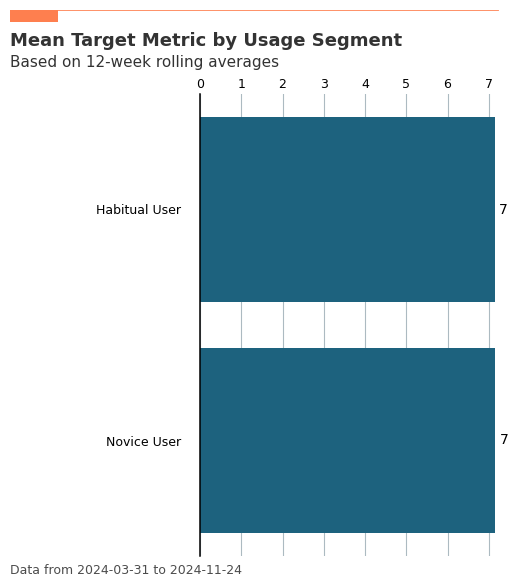

In [4]:
# Visualize the mean of `target_metric` by `UsageSegments_12w`
usage_segments_bar_plot = vi.create_bar(
    data=usage_segments_data,
    metric="target_metric",
    hrvar="UsageSegments_12w",
    return_type="plot",
    plot_title="Mean Target Metric by Usage Segment",
    plot_subtitle="Based on 12-week rolling averages"
)

# Display the bar plot
usage_segments_bar_plot.show()

### Visualize usage segments over time

Next, visualize the distribution of usage segments over time using `identify_usage_segments` with `return_type='plot'`. The following shows a horizontal stacked bar plot, which shows the evolution in the proportion of the usage segments over time. 

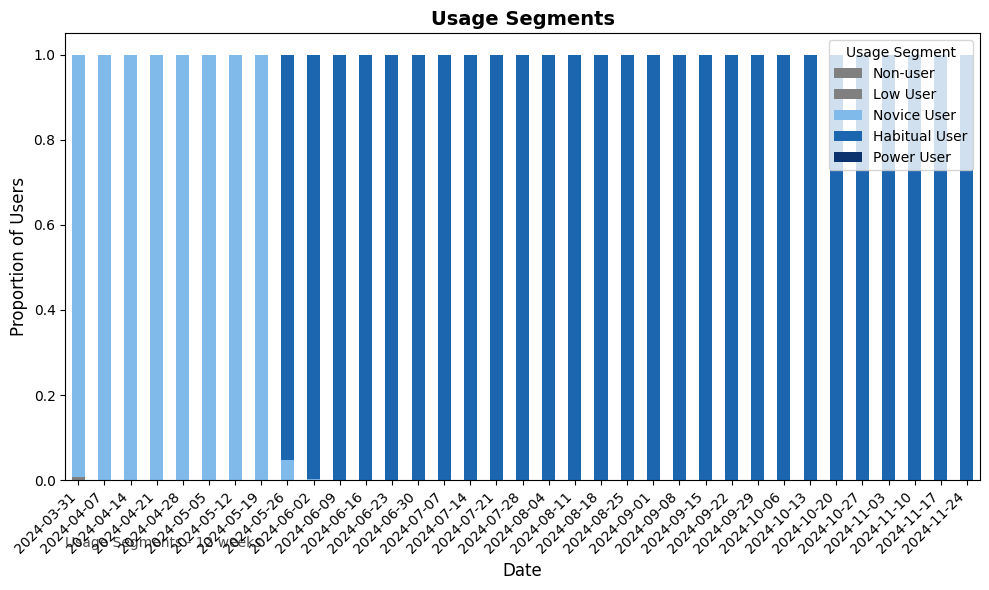

In [8]:
# Visualize usage segments over time
usage_segments_time_plot = vi.identify_usage_segments(
    data=pq_data,
    metric_str=[
        "Copilot_actions_taken_in_Teams",
        "Copilot_actions_taken_in_Outlook",
        "Copilot_actions_taken_in_Excel",
        "Copilot_actions_taken_in_Word",
        "Copilot_actions_taken_in_Powerpoint"
    ],
    version="12w",
    return_type="plot"
)

# Display the time plot
usage_segments_time_plot.show()

## Step 3: Compute favorability scores for ordinal metrics

Before calculating odds ratios, use `compute_fav()` to convert ordinal metrics into categorical variables representing favorable and unfavorable scores. This standardizes metrics to a 100-point scale, making results easier to interpret and compare.

Neutral scores are dropped to focus on the most meaningful responses.

In `usage_segments_data` printed below, it can be seen that `compute_fav()` has added several columns suffixing the `ordinal_metrics` columns with `_100` and `_fav`. 

In [9]:
# Define the ordinal metrics
ordinal_metrics = [
    "eSat",
    "Initiative",
    "Manager_Recommend",
    "Resources",
    "Speak_My_Mind",
    "Wellbeing",
    "Work_Life_Balance",
    "Workload"
]

# Compute favorability scores
usage_segments_data = vi.compute_fav(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics,
    item_options=5,  # Assuming a 5-point scale for ordinal metrics
    fav_threshold=70,
    unfav_threshold=40,
    drop_neutral=True
)

# Display the first few rows of the updated dataset
usage_segments_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Resources_100,Resources_fav,Speak_My_Mind_100,Speak_My_Mind_fav,Wellbeing_100,Wellbeing_fav,Work_Life_Balance_100,Work_Life_Balance_fav,Workload_100,Workload_fav
36,02723512-4f45-4385-8d1a-c23048e1e961,2024-04-07,26.310260,1,17.635230,124,10.887553,0.000000,3.322255,0.067661,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
83,02c55079-f137-4abb-9806-f58e9b60efd6,2024-06-30,17.401642,4,10.399207,84,5.253439,0.195852,3.203440,0.975272,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
123,02ddc980-8f37-4156-9397-6d621e445a00,2024-08-04,20.612899,3,14.130869,103,8.070390,0.577123,1.374351,0.000000,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
135,02ddc980-8f37-4156-9397-6d621e445a00,2024-10-27,19.514361,2,10.986860,91,6.221707,2.286118,2.294472,0.391576,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
164,032432ad-390c-4ce4-9f25-d5be080bd982,2024-09-15,34.160594,3,27.364673,182,12.926987,0.197464,6.306590,1.153810,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav


## Step 4: Calculate odds ratios for ordinal metrics

Now, calculate odds ratios for the favorability scores of these ordinal metrics:
- `eSat`
- `Initiative`
- `Manager_Recommend`
- `Resources`
- `Speak_My_Mind`
- `Wellbeing`
- `Work_Life_Balance`
- `Workload`

The independent variable is `UsageSegments_12w`.

In [13]:
# Calculate odds ratios
odds_ratios_table = vi.create_odds_ratios(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics,
    metric="UsageSegments_12w",
    return_type="table"
)

# Display the odds ratios table
print(odds_ratios_table)

   UsageSegments_12w Level  Odds_Ratio     Ordinal_Metric      n
0      Habitual User     1    1.000000               eSat    3.0
1        Novice User     1    1.000000               eSat    1.0
2      Habitual User     2   53.571429               eSat  135.0
3        Novice User     2   37.000000               eSat   49.0
4      Habitual User     4   18.142857               eSat   58.0
5        Novice User     4   10.333333               eSat   14.0
6      Habitual User     5    0.428571               eSat    1.0
7        Novice User     5    0.333333               eSat    NaN
8      Habitual User     1    1.000000         Initiative    4.0
9        Novice User     1    1.000000         Initiative    3.0
10     Habitual User     2   54.333333         Initiative  166.0
11       Novice User     2   18.142857         Initiative   57.0
12     Habitual User     4    1.444444         Initiative    6.0
13       Novice User     4    1.571429         Initiative    5.0
14     Habitual User     

Since favorability columns with the values `fav`, `unfav`, and `neu` have already been created using `compute_fav()`, you can use these directly in the proportional odds model to simplify the analysis.

When interpreting odds ratios, a value greater than 1 indicates that the odds of a favorable outcome are higher for the group compared to the reference group, while a value less than 1 means the odds are lower. An odds ratio of exactly 1 suggests no difference between groups. This helps you understand how different usage segments are associated with the likelihood of favorable responses on each metric.

In [14]:
# Define ordinal metrics with '_fav' suffix
ordinal_metrics_fav = [f"{metric}_fav" for metric in ordinal_metrics]

# Calculate odds ratios
odds_ratios_table_fav = vi.create_odds_ratios(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics_fav,
    metric="UsageSegments_12w",
    return_type="table"
)

# Display the odds ratios table
print(odds_ratios_table_fav)

   UsageSegments_12w  Level  Odds_Ratio         Ordinal_Metric    n
0      Habitual User    fav    1.000000               eSat_fav   59
1        Novice User    fav    1.000000               eSat_fav   14
2      Habitual User  unfav    2.953488               eSat_fav  137
3        Novice User  unfav    3.645161               eSat_fav   50
4      Habitual User    fav    1.000000         Initiative_fav    6
5        Novice User    fav    1.000000         Initiative_fav    5
6      Habitual User  unfav   38.230769         Initiative_fav  168
7        Novice User  unfav   12.090909         Initiative_fav   59
8      Habitual User    fav    1.000000  Manager_Recommend_fav   10
9        Novice User    fav    1.000000  Manager_Recommend_fav    5
10     Habitual User  unfav   23.285714  Manager_Recommend_fav  167
11       Novice User  unfav   12.090909  Manager_Recommend_fav   59
12     Habitual User    fav    1.000000          Resources_fav    1
13       Novice User    fav    1.000000         

In [ ]:
# Filter for Level == 'fav' only, and sort Odds_Ratio in descending order
odds_ratios_table_fav = odds_ratios_table_fav[odds_ratios_table_fav['Level'] == 'fav']
odds_ratios_table_fav = odds_ratios_table_fav.sort_values(by='Odds_Ratio', ascending=False)

print(odds_ratios_table_fav)

   UsageSegments_12w Level  Odds_Ratio         Ordinal_Metric    n
4      Habitual User   fav         1.0         Initiative_fav    6
5        Novice User   fav         1.0         Initiative_fav    5
8      Habitual User   fav         1.0  Manager_Recommend_fav   10
16     Habitual User   fav         1.0      Speak_My_Mind_fav    9
9        Novice User   fav         1.0  Manager_Recommend_fav    5
12     Habitual User   fav         1.0          Resources_fav    1
1        Novice User   fav         1.0               eSat_fav   14
17       Novice User   fav         1.0      Speak_My_Mind_fav    5
13       Novice User   fav         1.0          Resources_fav    1
21       Novice User   fav         1.0          Wellbeing_fav   63
0      Habitual User   fav         1.0               eSat_fav   59
20     Habitual User   fav         1.0          Wellbeing_fav  172


## Step 5: Visualize the odds ratios

Create a bar plot to visualize the odds ratios for the ordinal metrics, making it easier to compare the impact of usage segments.

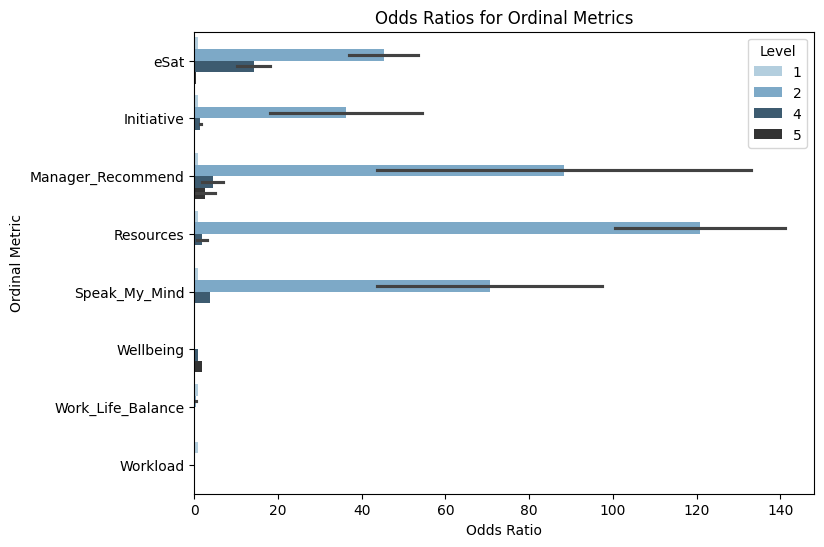

In [20]:
# Visualize odds ratios
odds_ratios_plot = vi.create_odds_ratios(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics,
    metric="UsageSegments_12w",
    return_type="plot"
)

# Display the plot
odds_ratios_plot.show()

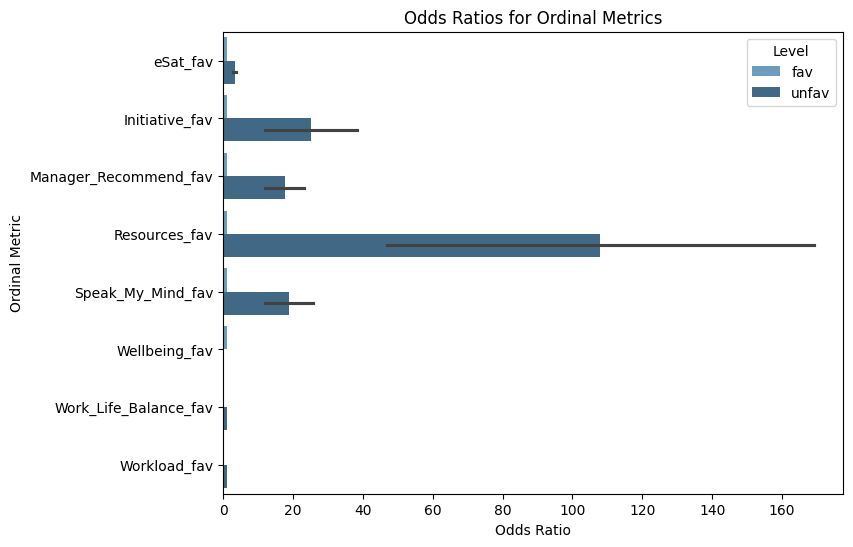

In [22]:
# Visualize odds ratios for favorability
odds_ratios_plot_fav = vi.create_odds_ratios(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics_fav,
    metric="UsageSegments_12w",
    return_type="plot"
)

# Display the plot
odds_ratios_plot_fav.show()

## Summary

In this notebook, you learned how to:
1. Load demo data (`pq_data`).
2. Create an independent variable (`UsageSegments_12w`) using `identify_usage_segments`.
3. Compute favorability scores for ordinal metrics with `compute_fav`.
4. Calculate odds ratios for ordinal metrics using `create_odds_ratios`.
5. Visualize the results for interpretation.

By combining `create_odds_ratios` with `compute_fav`, you can consistently analyze the relationship between ordinal metrics and independent variables, regardless of the original point scale.